In [1]:
# Balance data
#    Objectif: Deal with the probleme of unbalanced data using several technics
#    Input: 
#     preprocessed data without PCA:
#        x_train.csv 
#        y_train.csv 
#        x_test.csv 
#        y_test.csv 
#   Output:
#    Balanced data:
#        x_st_train.csv 
#        y_st_train.csv 

#    Author: SOUAD BOUTANE 


In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

#subplot
from pylab import *

In [2]:
####################################    Balance DATA     ################################
######################################## LOAD DATA ####################################

X = np.genfromtxt('../data/x_train.csv', delimiter=',')
Y=np.genfromtxt('../data/y_train.csv', delimiter=',')


In [11]:
X.shape

(1660852, 9)

In [3]:
#To plot data

def plot_data(X, y,label):
    #histogram for class size
    
    subplot(1,2,1)
    pd.value_counts(y).plot.bar()
    plt.title(label)
    plt.xlabel('Class')
    plt.ylabel('Frequency')
    plt.show()
    '''
    #plot class
    plt.subplot(1,2,2)
    plt.scatter(X[100,0], X[100,2], alpha=0.2,c=y[100])
    plt.title('Class for first 1000 transaction')
    plt.legend(loc='upper right')
    plt.figure(figsize=(15,10))
    plt.show()
  '''

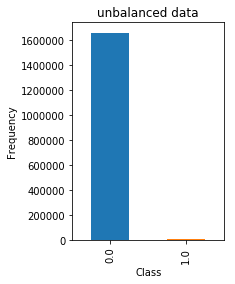

In [4]:
plot_data(X, Y,'unbalanced data')

In [ ]:
####################################    DATA PREPROCESSING     ################################
  #################################### OVERSAMPLING SMOTE ########################################
from imblearn.over_sampling import SMOTE

smote = SMOTE(ratio='minority',k_neighbors=6)
X_sm, Y_sm = smote.fit_sample(X, Y)

print('After UnderSampling, the shape of training: {}'.format(X_sm.shape))
plot_data(X_sm, Y_sm,'SMOTE over-sampling')

In [ ]:
####################################    DATA PREPROCESSING     ################################
#################################### UNDERSAMPLING TOMEKLINK ########################################

from imblearn.under_sampling import TomekLinks

TL = TomekLinks(return_indices=True, ratio='majority')
X_tl1, y_tl1,i= TL.fit_sample(X[:10000], Y[:10000])
X_tl2, y_tl2,i= TL.fit_sample(X[10000:16852], Y[10000:16852])

print('After UnderSampling, the shape of training: {}'.format(X_tl1.shape))
print('After UnderSampling, the shape of training: {}'.format(X_tl2.shape))

plot_data(X_tl, y_tl, 'Tomek links under-sampling')

#It takes many time and doesn't work at the end 

ValueError: Found input variables with inconsistent numbers of samples: [10, 90]

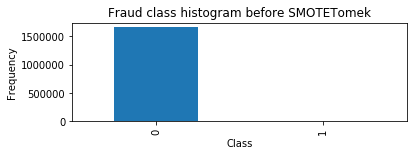

In [20]:
####################################    DATA PREPROCESSING     ################################
###################################### Unbalanced data ########################################

#Unbalanced data
from imblearn.combine import SMOTETomek

#---------------------- OverSampling and UnderSampling

smt = SMOTETomek(ratio='auto',random_state=0)
x_ts, y_ts = smt.fit_sample(X, Y.values.ravel())


print('After OverUnderSampling, the shape of train_X: {}'.format(x_ts.shape))
plot_data(X_ts, y_ts, 'TomekSmote under-over-sampling')
